# **Universidad Galileo**

## **Ciencia de Datos en Python**

### **César Luis Polanco, 20062088**

## **Introducción del proyecto final de curso**

El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear **modelos predictivos de regresión lineal uni-variable** sencillos de la forma: $$y = f(x) =  mx +b$$ 

Donde:
- y = la variable dependiente
- x = variable independiente
- m = pendiente de la recta(parámetro del modelo)
- b = intercepto(parámetro del modelo)



In [105]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [106]:
url = "./proyecto_training_data.npy"
datos = np.load(url) 
print(datos[1-5:])

[[2.10000e+05 6.00000e+00 2.07300e+03 7.00000e+00 1.97800e+03 8.50000e+01]
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


### **Explicación de datos (texto literal de archivo)**

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **OverallQual**: Overall material and finish quality, rates the overall material and finish of the house
    - 10 -> Very Excellent
    - 9 -> Excellent
    - 8 -> Very Good
    - 7 -> Good
    - 6 -> Above Average
    - 5 -> Average
    - 4 -> Below Average
    - 3 -> Fair
    - 2 -> Poor
    - 1 -> Very Poor
- **1stFlrSF**: First Floor square feet
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **YearBuilt**: Original construction date
- **LotFrontage**: Linear feet of street connected to property

In [107]:
encabezados = list(["PrecioVenta","CalidadMaterial","PiesCuadradosPisoUno","TotalHabitaciones","AñoConstruccion","PiesLinealesDePropiedad"])
df = pd.DataFrame(datos, columns=encabezados)
df.head()

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   float64
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   float64
 4   AñoConstruccion          1460 non-null   float64
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## **Verificación de datos**

In [109]:
df.shape

(1460, 6)

In [110]:
## Verificación de nan values
df[df.isna().any(axis=1)]

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
12,144000.0,5.0,912.0,4.0,1962.0,NaN
14,157000.0,6.0,1253.0,5.0,1960.0,NaN
16,149000.0,6.0,1004.0,5.0,1970.0,NaN
24,154000.0,5.0,1060.0,6.0,1968.0,NaN
...,...,...,...,...,...,...
1429,182900.0,6.0,1440.0,7.0,1981.0,NaN
1431,143750.0,6.0,958.0,5.0,1976.0,NaN
1441,149300.0,6.0,848.0,3.0,2004.0,NaN
1443,121000.0,6.0,952.0,4.0,1916.0,NaN


In [111]:
##Remplazar valores NaN
df['PiesLinealesDePropiedad'] = df['PiesLinealesDePropiedad'].fillna(value=df.mean())

In [112]:
##Rectificar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   float64
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   float64
 4   AñoConstruccion          1460 non-null   float64
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [113]:
#Cambio de presentación de datos

df["CalidadMaterial"] = df["CalidadMaterial"].astype(int)
df["TotalHabitaciones"] = df["TotalHabitaciones"].astype(int)
df["AñoConstruccion"] = df["AñoConstruccion"].astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   int32  
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   int32  
 4   AñoConstruccion          1460 non-null   int32  
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(3), int32(3)
memory usage: 51.5 KB


In [115]:
#Visualización inicial
df

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1455,175000.0,6,953.0,7,1999,62.0
1456,210000.0,6,2073.0,7,1978,85.0
1457,266500.0,7,1188.0,9,1941,66.0
1458,142125.0,5,1078.0,5,1950,68.0


In [116]:
#Trains Test Split by loc
rows, cols = df.shape
df_train = df.loc[:int(rows*0.8),]
df_test = df.loc[int(rows*0.8)+1:,]

In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1169 non-null   float64
 1   CalidadMaterial          1169 non-null   int32  
 2   PiesCuadradosPisoUno     1169 non-null   float64
 3   TotalHabitaciones        1169 non-null   int32  
 4   AñoConstruccion          1169 non-null   int32  
 5   PiesLinealesDePropiedad  963 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 41.2 KB


In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 1169 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              291 non-null    float64
 1   CalidadMaterial          291 non-null    int32  
 2   PiesCuadradosPisoUno     291 non-null    float64
 3   TotalHabitaciones        291 non-null    int32  
 4   AñoConstruccion          291 non-null    int32  
 5   PiesLinealesDePropiedad  238 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 10.4 KB


## **Exploración de datos**

Para cada variable en el dataset calcular((usando numpy o pandas):
   - media
   - valor máximo
   - valor mínimo 
   - rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
   - desviación estándar 

In [119]:
#Se consigue todos excepto el rango
round(df_train.describe(),4)

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,963.0000
mean,180636.8212,6.1009,1156.3918,6.4859,1971.4200,69.9990
std,78798.0219,1.3774,373.6276,1.6085,29.9579,23.5213
min,34900.0000,1.0000,334.0000,2.0000,1875.0000,21.0000
25%,129900.0000,5.0000,882.0000,5.0000,1954.0000,59.0000
50%,163000.0000,6.0000,1086.0000,6.0000,1973.0000,70.0000
75%,214000.0000,7.0000,1390.0000,7.0000,2000.0000,80.0000
max,755000.0000,10.0000,3228.0000,14.0000,2010.0000,313.0000


In [120]:
#work around para obtener el rango, crear un frame con los valores de describe
df_train_range = round(df_train.describe(),4)
df_train_range


,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,963.0000
mean,180636.8212,6.1009,1156.3918,6.4859,1971.4200,69.9990
std,78798.0219,1.3774,373.6276,1.6085,29.9579,23.5213
min,34900.0000,1.0000,334.0000,2.0000,1875.0000,21.0000
25%,129900.0000,5.0000,882.0000,5.0000,1954.0000,59.0000
50%,163000.0000,6.0000,1086.0000,6.0000,1973.0000,70.0000
75%,214000.0000,7.0000,1390.0000,7.0000,2000.0000,80.0000
max,755000.0000,10.0000,3228.0000,14.0000,2010.0000,313.0000


In [121]:
##Calcular el rango buscando el valor máximo y mínimo (agregar al dataframe)
round(df_train_range.describe().append(pd.Series(df_train_range.loc['max'] - df_train_range.loc['min'], name = "range")), 4)

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000
mean,194675.4804,150.6848,1202.3774,151.3868,1622.7972,199.9400
std,237887.6790,411.4719,902.2724,411.1955,702.3184,322.0925
min,1169.0000,1.0000,334.0000,1.6085,29.9579,21.0000
25%,67823.5164,4.0944,754.9069,4.2500,1698.5000,50.1303
50%,146450.0000,6.0504,1121.1959,6.2430,1962.7100,69.9995
75%,188977.6159,7.7500,1224.2500,8.7500,1979.7500,138.2500
max,755000.0000,1169.0000,3228.0000,1169.0000,2010.0000,963.0000
range,720100.0000,9.0000,2894.0000,12.0000,135.0000,292.0000


### **Histograma de cada variable**

In [123]:
%matplotlib inline

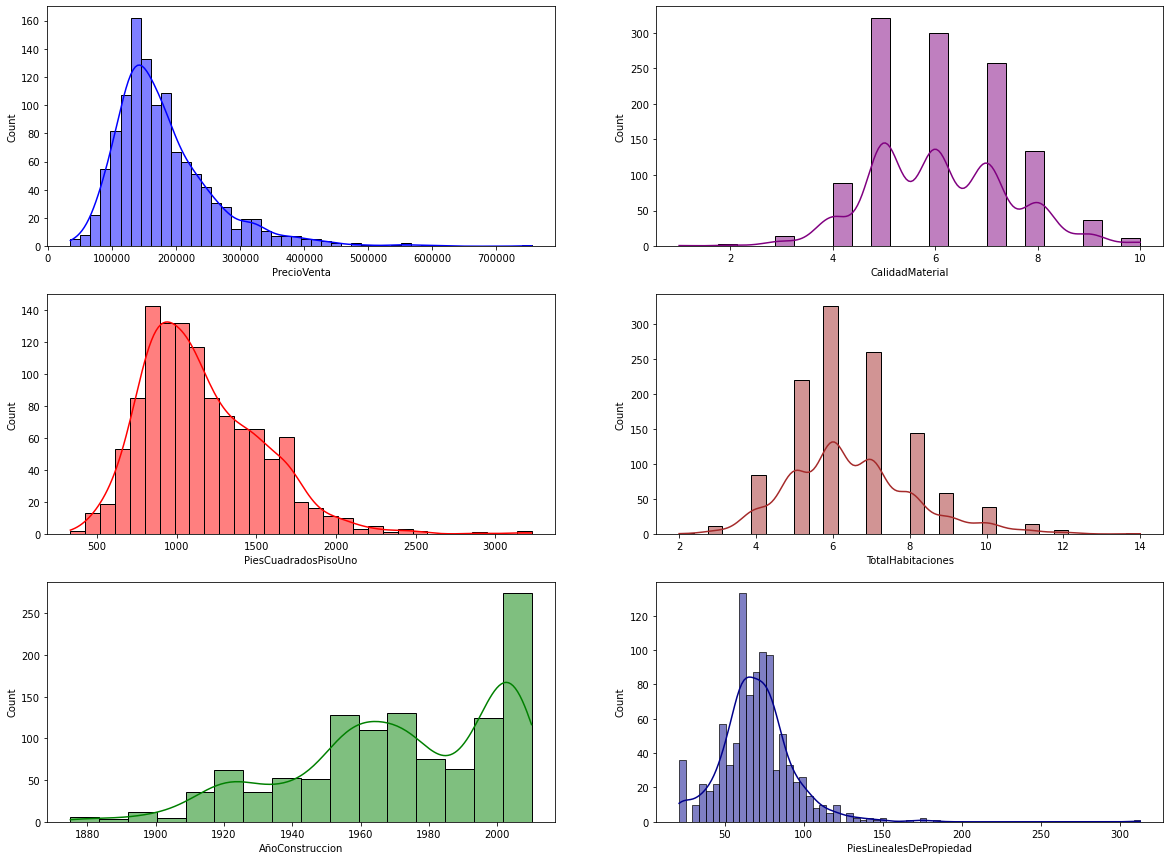

In [139]:
fig  = plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
c = ["blue", "purple", "red", "brown", "green", "darkblue"]

for i in range(cols):
  plt.subplot(3, 2, i+1)
  sns.histplot(df_train.iloc[:,i], kde=True, color=c[i])
plt.show()


### **Matriz de correlación**

In [100]:
corr = round(df_train.corr(), 4)
corr

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
PrecioVenta,1.0000,0.7938,0.6163,0.5648,0.5330,0.3638
CalidadMaterial,0.7938,1.0000,0.4694,0.4443,0.5670,0.2417
PiesCuadradosPisoUno,0.6163,0.4694,1.0000,0.4094,0.2917,0.4169
TotalHabitaciones,0.5648,0.4443,0.4094,1.0000,0.1225,0.3409
AñoConstruccion,0.5330,0.5670,0.2917,0.1225,1.0000,0.1186
PiesLinealesDePropiedad,0.3638,0.2417,0.4169,0.3409,0.1186,1.0000


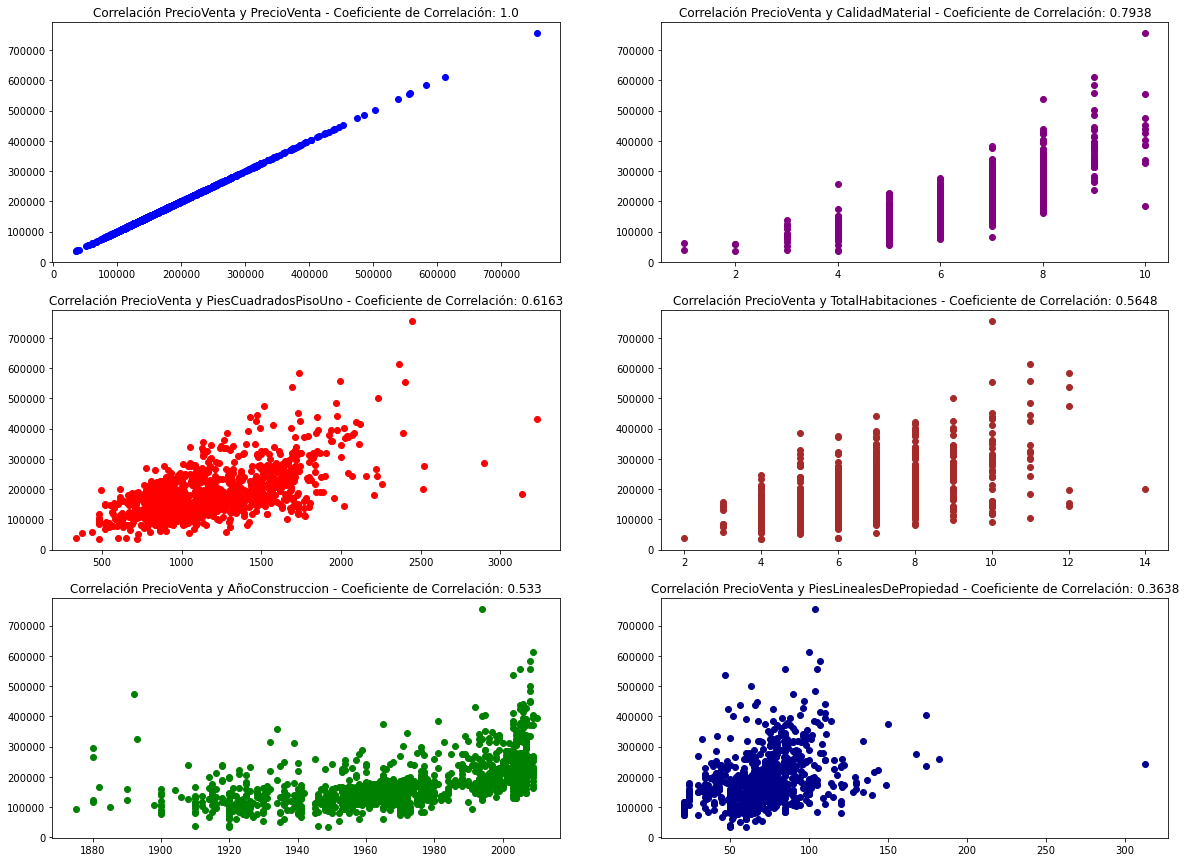

In [146]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

#scatter
for i in range(cols):
    plt.subplot(3, 2, i+1)
    plt.scatter(df_train.iloc[:,i], df_train.iloc[:,0], color=c[i])
    plt.title("Correlación PrecioVenta y {} - Coeficiente de Correlación: {}".format(df_train.columns[i], corr.iloc[0,i]))
plt.show()

plt.show()


### **Selección de variables**
- CalidadMateiral con coeficiente de correlación de **0.7938**
- PiesCuadradosPisoUno con coeficiente de correlación de **0.6163**